6.1 ConvNet: MNIST image classifier (digits)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/assignment06')
!pwd

Mounted at /content/drive
/content/drive/My Drive/assignment06


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from keras import layers, models
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical

Load the Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# get the size of the data sets
print(f'train_images: {train_images.shape}')
print(f'test_images: {test_images.shape}')
print(f'train_labels: {train_labels.shape}')
print(f'test_labels: {test_labels.shape}')

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)
train_labels: (60000,)
test_labels: (10000,)


Text(0.5, 1.0, '5')

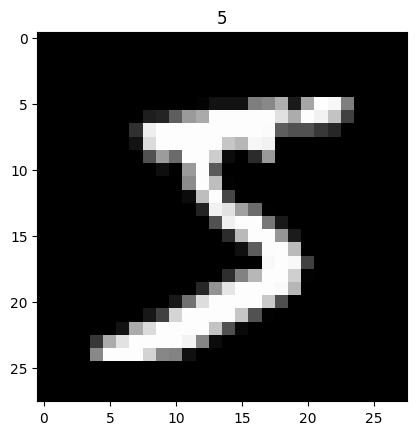

In [7]:
plt.imshow(train_images[0], cmap = 'gray')
plt.title(train_labels[0])

In [8]:
# reshape datasets
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [9]:
# normalize datasets
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [10]:
# convert labels to numeric
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [11]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

Build the Model

In [12]:
# Instantiate a convnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [13]:
# Add a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

Compile the Model

In [14]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Train the model

In [15]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 5, batch_size = 64,
                    validation_data = (x_val, y_val))

Epoch 1/5
782/782 [==============================] - 61s 76ms/step - loss: 0.1906 - accuracy: 0.9385 - val_loss: 0.0578 - val_accuracy: 0.9832
Epoch 2/5
782/782 [==============================] - 60s 76ms/step - loss: 0.0498 - accuracy: 0.9840 - val_loss: 0.0502 - val_accuracy: 0.9860
Epoch 3/5
782/782 [==============================] - 57s 72ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0463 - val_accuracy: 0.9867
Epoch 4/5
782/782 [==============================] - 57s 73ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0426 - val_accuracy: 0.9888
Epoch 5/5
782/782 [==============================] - 58s 74ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.0443 - val_accuracy: 0.9884


Train History

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot Training and Validation Loss

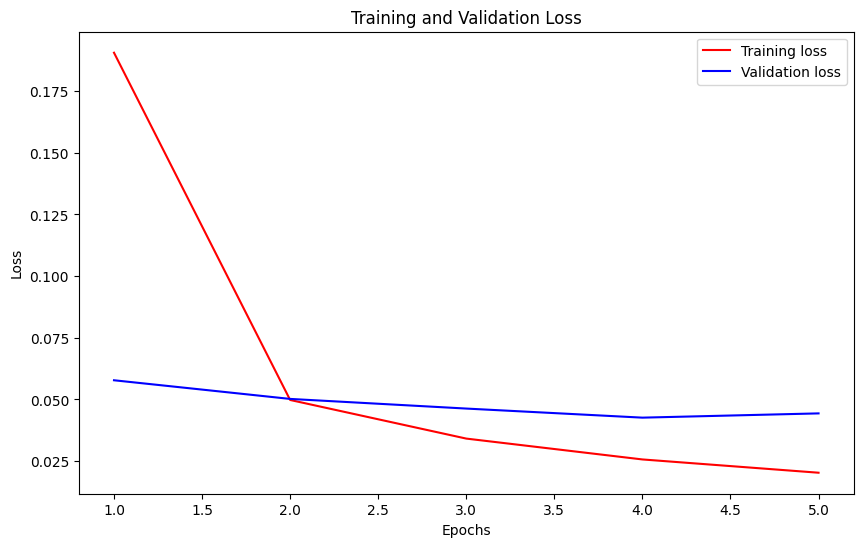

In [17]:
plt.figure(figsize = (10, 6))

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

fig = plt.gcf()
fig.savefig('results/mnist/train_val_loss.png')

plt.show()

<Figure size 640x480 with 0 Axes>

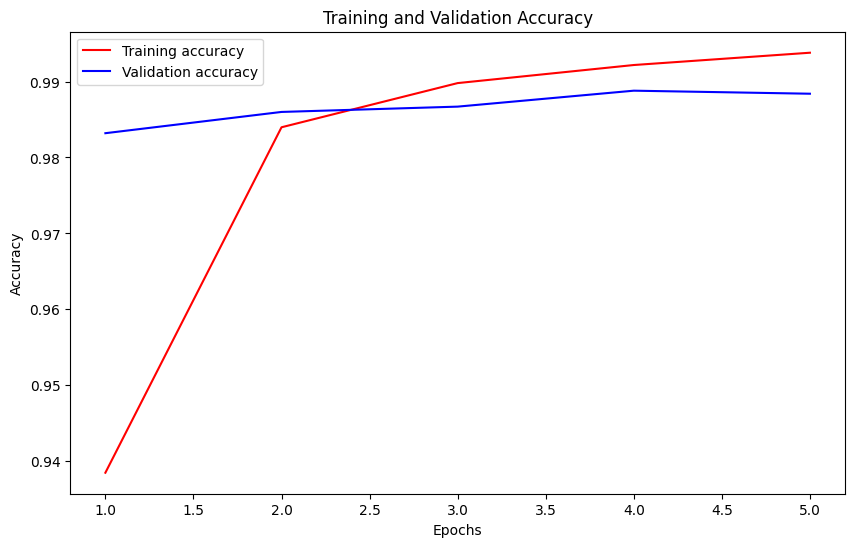

In [18]:
plt.clf()

plt.figure(figsize = (10, 6))

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

fig = plt.gcf()
fig.savefig('results/mnist/train_val_accuracy.png')

plt.show()

Evaluate the model

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.0303 - accuracy: 0.9901


In [20]:
print(f'Test accurancy: {test_acc * 100:.1f}%')
print(f'Test loss: {test_loss:.3f}')

Test accurancy: 99.0%
Test loss: 0.030


In [21]:
model.save('results/mnist/mnist.h5', history)

In [22]:
pickle.dump({'test_accuracy': test_acc, 
            'test_loss': test_loss, 
            'history_dict': history_dict},
            open("results/mnist/training_metrics", "wb"))